In [138]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


In [175]:
# Define the start and end dates
start_date = '2022-01-01'
end_date   = '2024-12-31'

# Define the List of tickers
symbols = ['ADTN', 'RBBN', 'AIOT', 'ASUR']

# Fetch data with date range specified
data = yf.download(
    symbols,
    start=start_date,  # <-- Add this
    end=end_date,      # <-- Add this
    
)


[*********************100%***********************]  4 of 4 completed


In [176]:
data

Price           Close                         High                    \
Ticker           ADTN  AIOT  ASUR  RBBN       ADTN  AIOT  ASUR  RBBN   
Date                                                                   
2022-01-03  21.984884  5.01  7.85  6.09  22.358160  5.07  7.93  6.19   
2022-01-04  20.951202  4.92  7.75  6.10  21.927458  5.00  7.95  6.13   
2022-01-05  20.635357  4.81  7.42  6.11  21.219196  5.00  7.82  6.15   
2022-01-06  20.099371  4.92  7.27  6.12  20.654496  4.99  7.49  6.26   
2022-01-07  19.553818  4.92  7.25  6.11  20.424790  4.96  7.36  6.22   
...               ...   ...   ...   ...        ...   ...   ...   ...   
2024-12-23   8.280000  6.59  9.10  4.17   8.440000  6.73  9.19  4.39   
2024-12-24   8.400000  6.83  9.14  4.30   8.440000  6.86  9.15  4.30   
2024-12-26   8.490000  7.10  9.49  4.30   8.510000  7.14  9.50  4.30   
2024-12-27   8.210000  6.80  9.35  4.10   8.400000  7.20  9.61  4.25   
2024-12-30   8.300000  6.66  9.41  4.15   8.420000  6.79  9.51  4.17   

Price             Low                         Open                    Volume  \
Ticker           ADTN  AIOT  ASUR  RBBN       ADTN  AIOT  ASUR  RBBN    ADTN   
Date                                                                           
2022-01-03  21.812605  4.70  7.70  6.05  21.946601  4.77  7.90  6.08  453500   
2022-01-04  20.673641  4.87  7.75  6.05  21.927458  5.00  7.82  6.12  908000   
2022-01-05  20.597073  4.80  7.37  6.07  20.960775  4.86  7.76  6.10  476200   
2022-01-06  20.041945  4.69  7.16  6.07  20.568356  4.84  7.49  6.10  553300   
2022-01-07  19.276254  4.78  7.18  6.08  20.003660  4.90  7.18  6.09  515200   
...               ...   ...   ...   ...        ...   ...   ...   ...     ...   
2024-12-23   8.210000  6.37  9.03  4.12   8.210000  6.52  9.11  4.20  737100   
2024-12-24   8.210000  6.55  9.04  4.13   8.310000  6.71  9.14  4.19  178700   
2024-12-26   8.290000  6.72  9.08  4.15   8.350000  6.78  9.09  4.29  256600   
2024-12-27   8.140000  6.75  9.20  4.07   8.400000  7.18  9.47  4.24  277000   
2024-12-30   8.110000  6.49  9.12  4.01   8.110000  6.68  9.26  4.10  589800   

Price                                
Ticker         AIOT    ASUR    RBBN  
Date                                 
2022-01-03   142600   32000  317600  
2022-01-04    51400   22500  274300  
2022-01-05   295100   37900  358000  
2022-01-06   294500   49300  341000  
2022-01-07   396100   18900  265500  
...             ...     ...     ...  
2024-12-23  1639300  130400  380800  
2024-12-24   754600   87100  147200  
2024-12-26  1365600  194700  169600  
2024-12-27  7141600   82800  310400  
2024-12-30  3464000   85400  309600  

[752 rows x 20 columns]

In [177]:
# Resample data to monthly frequency
data = data['Close'].resample('ME').last()

In [178]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [179]:
# Convert index to datetime
data.index = pd.to_datetime(data.index)

In [180]:
data.index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='Date', freq='ME')

In [181]:
# Clean and Prepare Data
# Subset Adjusted Close Prices
prices = data.fillna(method='ffill')
prices.index = pd.to_datetime(prices.index)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10852\1933067224.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = data.fillna(method='ffill')


In [182]:
print(prices)

Ticker           ADTN  AIOT   ASUR  RBBN
Date                                    
2022-01-31  18.386139  3.57   7.25  4.50
2022-02-28  19.791056  3.57   6.97  3.04
2022-03-31  17.734093  2.97   5.95  3.09
2022-04-30  16.715219  2.64   6.06  3.45
2022-05-31  17.898153  2.37   5.94  2.83
2022-06-30  16.932251  2.17   5.70  3.04
2022-07-31  23.268566  2.75   5.70  3.39
2022-08-31  22.529209  3.19   5.44  3.51
2022-09-30  18.981150  3.08   5.72  2.22
2022-10-31  21.773066  2.65   6.60  2.65
2022-11-30  19.734425  2.82   7.85  2.53
2022-12-31  18.293528  2.69   9.34  2.79
2023-01-31  18.371414  2.86  10.63  3.51
2023-02-28  16.988932  2.78  13.35  4.46
2023-03-31  15.524109  3.43  14.50  3.42
2023-04-30   8.926852  2.87  13.34  2.56
2023-05-31   8.811728  3.13  11.81  2.78
2023-06-30  10.413860  3.00  12.16  2.79
2023-07-31   9.622684  2.71  13.64  3.18
2023-08-31   8.550000  2.46  12.54  2.96
2023-09-30   8.230000  2.07   9.46  2.68
2023-10-31   6.570000  1.85   8.46  1.88
2023-11-30   5.2

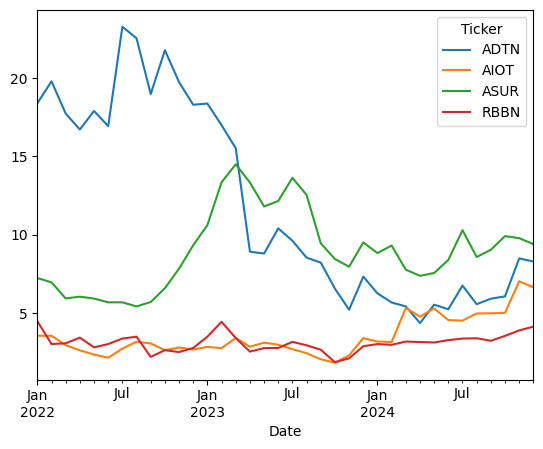

In [183]:
prices.plot()
plt.show()

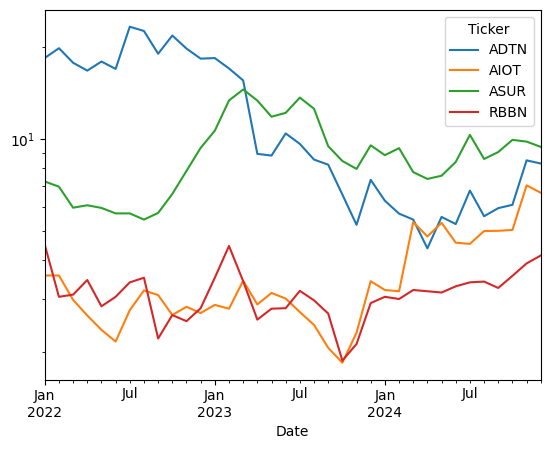

In [184]:
prices.plot()
plt.yscale("log")
plt.show()


In [185]:
# Resample data to monthly frequency
monthly_data = prices.resample('ME').mean()

In [186]:
monthly_data

Ticker,ADTN,AIOT,ASUR,RBBN
Date,,,,
2022-01-31,18.386139,3.57,7.25,4.50
2022-02-28,19.791056,3.57,6.97,3.04
2022-03-31,17.734093,2.97,5.95,3.09
2022-04-30,16.715219,2.64,6.06,3.45
2022-05-31,17.898153,2.37,5.94,2.83
2022-06-30,16.932251,2.17,5.70,3.04
2022-07-31,23.268566,2.75,5.70,3.39
2022-08-31,22.529209,3.19,5.44,3.51
2022-09-30,18.981150,3.08,5.72,2.22


In [187]:
# Calculate Arithmetic Returns
# Compute arithmetic returns
returns = data.pct_change().dropna()
returns.index = pd.to_datetime(returns.index)

In [188]:
returns

Ticker,ADTN,AIOT,ASUR,RBBN
Date,,,,
2022-02-28,0.076412,0.000000,-0.038621,-0.324444
2022-03-31,-0.103934,-0.168067,-0.146341,0.016447
2022-04-30,-0.057453,-0.111111,0.018487,0.116505
2022-05-31,0.070770,-0.102273,-0.019802,-0.179710
2022-06-30,-0.053967,-0.084388,-0.040404,0.074205
2022-07-31,0.374216,0.267281,0.000000,0.115132
2022-08-31,-0.031775,0.160000,-0.045614,0.035398
2022-09-30,-0.157487,-0.034483,0.051471,-0.367521
2022-10-31,0.147089,-0.139610,0.153846,0.193694


In [189]:
# Compute Risk-Parity Weights
def compute_risk_parity_weights(returns, window_size=12):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window=window_size).std() * np.sqrt(12)  # Annualized volatility
    rolling_inverse_vol = 1 / rolling_vol

     # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.div(rolling_inverse_vol.sum(axis=1), axis=0)
    
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1)
    
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 12)

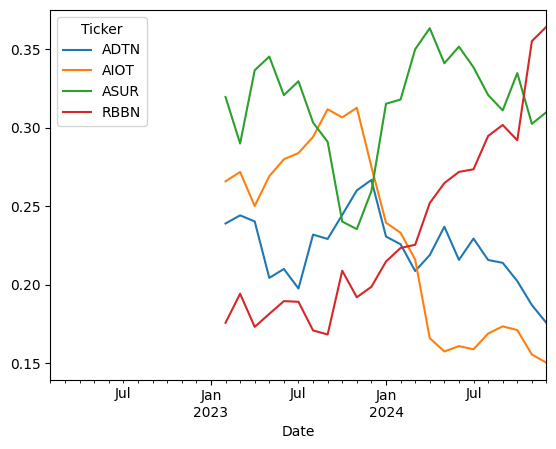

In [190]:
risk_parity_weights.plot()
plt.show()

In [191]:
# Calculate weighted returns
weighted_returns = returns * risk_parity_weights
weighted_returns = weighted_returns.dropna()
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [192]:
print(risk_parity_portfolio_returns)

Date
2023-02-28    0.103900
2023-03-31    0.022205
2023-04-30   -0.213371
2023-05-31   -0.002293
2023-06-30    0.036731
2023-07-31    0.024097
2023-08-31   -0.089249
2023-09-30   -0.145380
2023-10-31   -0.169608
2023-11-30    0.038295
2023-12-31    0.360326
2024-01-31   -0.061176
2024-02-29   -0.009466
2024-03-31    0.096641
2024-04-30   -0.080287
2024-05-31    0.086162
2024-06-30    0.017878
2024-07-31    0.149317
2024-08-31   -0.072310
2024-09-30    0.016259
2024-10-31    0.066184
2024-11-30    0.167443
2024-12-31   -0.001895
Freq: ME, dtype: float64


In [193]:
# 8. Evaluate Portfolio Performance
# Compute basic metrics
annual_mean_return = risk_parity_portfolio_returns.mean() * 12
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurtosis()

# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns / running_max) - 1
max_drawdown = drawdown.min()

# Compute Sharpe ratio (assuming risk-free rate = 0)
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_returns = risk_parity_portfolio_returns.copy()
downside_returns[downside_returns > 0] = 0
downside_std = downside_returns.std() * np.sqrt(12)
sortino_ratio = annual_mean_return / downside_std

# Compute Calmar ratio
calmar_ratio = annual_mean_return / abs(max_drawdown)

In [194]:
# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.1776
Annual Volatility: 0.4246
Skewness: 0.6396
Kurtosis: 1.8600
Maximum Drawdown: -0.4614
Sharpe Ratio: 0.4183
Sortino Ratio: 0.8113
Calmar Ratio: 0.3849


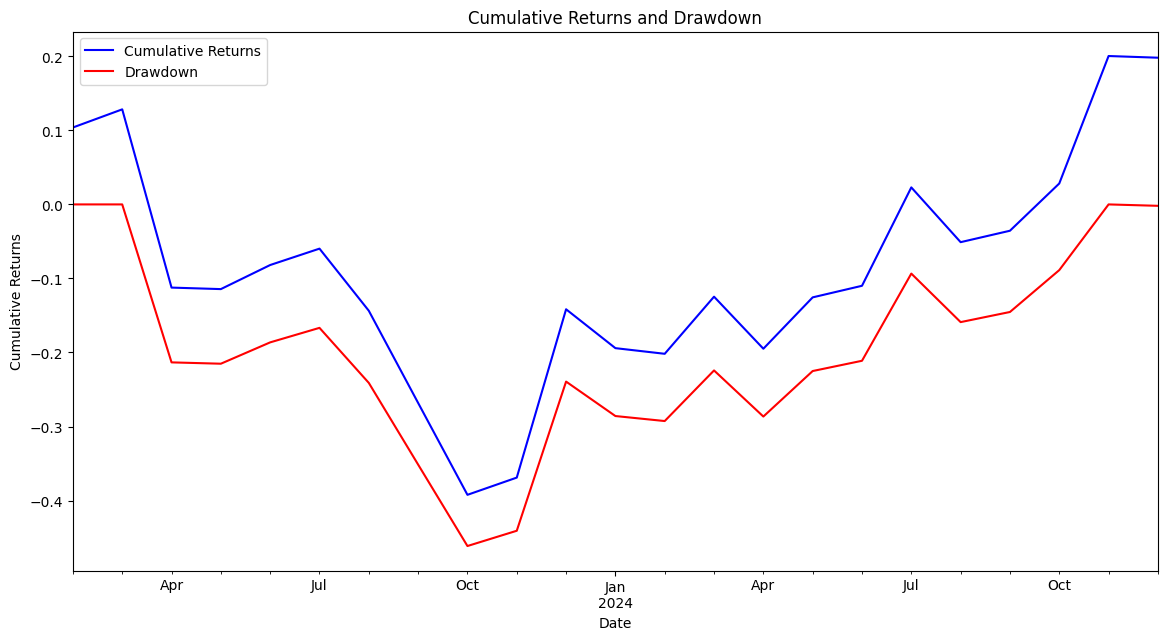

In [195]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

In [196]:
# Compute drawdowns for each ticker
cumulative_prices = data.ffill()
running_max = cumulative_prices.cummax()
drawdowns = (cumulative_prices / running_max) - 1
worst_drawdown = drawdowns.min()
print(worst_drawdown)

Ticker
ADTN   -0.811763
AIOT   -0.481793
ASUR   -0.490345
RBBN   -0.582222
dtype: float64


In [199]:
cumulative_returns = (1 + returns).cumprod() - 1
best_ticker = cumulative_returns.iloc[-1].idxmax()
print(f"Highest Cumulative Return: {best_ticker}")


Highest Cumulative Return: AIOT


In [201]:
# Calculate cumulative returns for each ticker
cumulative_returns = (1 + returns).cumprod() - 1

In [203]:
# Calculate cumulative returns for each ticker
cumulative_returns = (1 + returns).cumprod() - 1

# Get the final cumulative return for each asset
final_cumulative_returns = cumulative_returns.iloc[-1]

In [204]:
final_cumulative_returns

Ticker
ADTN   -0.548573
AIOT    0.865546
ASUR    0.297931
RBBN   -0.077778
Name: 2024-12-31 00:00:00, dtype: float64

In [206]:
# Compute volatility for the full period (annualized)
full_period_volatility = returns.std() * np.sqrt(12)  # Annualized volatility
print("Historical Annualized Volatility (2022–2024):")
print(full_period_volatility.sort_values(ascending=False))

Historical Annualized Volatility (2022–2024):
Ticker
AIOT    0.669804
ADTN    0.634354
RBBN    0.570731
ASUR    0.423198
dtype: float64


In [ ]:
# I was planning to pick a ticker to invest in from the tickers mentioned above and AIOT shows the best option. 
# it has the highest cumulative return the least severe drawdown and the best risk-adjusted metrics (Sharpe/Sortino ratios)
# However, it has a 65% annualized 